In [1]:
#import the required libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import required datasets
df=pd.read_csv('clean_data.csv')
df_airplane=pd.read_csv('plane-data.csv')

In [3]:
#color for visualisations
my_color=sns.color_palette('YlGnBu')

In [4]:
# exploring both datasets
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743,745,1024,1018,US,343,...,1587,45,13,0,0,0,0,0,0,0
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,1587,27,19,0,0,0,0,0,0,0
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,1587,4,11,0,0,0,0,0,0,0
3,2006,1,11,3,1753,1755,1925,1933,US,300,...,872,16,10,0,0,0,0,0,0,0
4,2006,1,11,3,824,832,1015,1015,US,765,...,872,27,12,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,1605,1749,1736,DL,58,...,403,14,17,0,0,0,0,0,0,0
14268924,2007,12,15,6,1902,1851,2110,2105,DL,59,...,1589,6,21,0,0,0,0,0,0,0
14268925,2007,12,15,6,1024,1025,1750,1735,DL,61,...,1946,14,19,0,0,0,0,15,0,0
14268926,2007,12,15,6,1353,1315,1658,1622,DL,62,...,732,11,14,0,0,0,0,0,0,36


In [5]:
# filtering the dataframe df to consider delays > 0 as otherwise planes are early or on time
df=df[df['ArrDelay']>0]
df=df[df['DepDelay']>0]

In [6]:
df_airplane

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [7]:
# include all required columns in a new dataframe
dt=df.loc[:,['Year', 'Month', 'DayofMonth', 'DayOfWeek','DepDelay','ArrDelay','DepTime','TailNum']]

In [8]:
# renaming columns in df_planes , this will make it easier to merge both dt and df_airplane on 'TailNum'
df_airplane.rename(columns={'tailnum':'TailNum', 'year': 'Manufactured_year'},inplace=True)

df_airplane

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufactured_year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [9]:
# keeping only neccesary columns in df_airplanes for analysis
df_airplane = df_airplane.iloc[:,0:9]
df_airplane

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufactured_year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [10]:
df_merge=pd.merge(dt,df_airplane,how='inner',on='TailNum')  # merging both dataframes on 'TailNUm'

In [11]:
df_merge # exploring the dataset

,Year,Month,DayofMonth,DayOfWeek,DepDelay,ArrDelay,DepTime,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufactured_year
0,2006,1,11,3,132,149,1752,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
1,2006,1,11,3,121,93,2011,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
2,2006,1,12,4,39,23,739,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
3,2006,1,13,5,52,42,2052,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
4,2006,1,13,5,130,144,910,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137479,2007,12,27,4,24,61,1309,N665JB,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
4137480,2007,12,29,6,6,40,606,N665JB,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
4137481,2007,12,29,6,52,45,1252,N665JB,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
4137482,2007,12,29,6,37,51,842,N665JB,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007


In [12]:
df_merge["Manufactured_year"].value_counts()  # count of each element under "Manufactured_year"

2001    333646
2002    289124
2003    275142
2000    274007
1999    272260
2004    247006
1998    216314
2005    196353
1988    130733
1996    126463
1997    123949
1991    122723
1990    116555
1987    112237
None    111879
1992    110796
1994    109139
2006    108115
1995    103167
1989    100319
1985     89723
1993     84038
1986     80142
2007     29710
1984     23656
1968     19015
1983     13901
1979     10147
1967     10085
1969      9167
1976      8717
1975      8158
1978      8155
1980      7118
1977      4774
1982      4338
0000      3394
1973      2238
1959      1610
1970      1505
1963      1024
1974      1020
1966       970
1964       900
1962       870
1965       808
1971       745
1957       493
1972       156
1956       150
Name: Manufactured_year, dtype: int64

In [13]:
# create a dataframe with the average delays with regard to year of manufacture
#we get the mean delay by manufacturing year
avgdelay_manu=df_merge[['Manufactured_year','DepDelay','ArrDelay']].groupby(['Manufactured_year']).mean().reset_index(drop=False)
# inlcluding a new column 'Total_delay' that sums the mean of both 'ArrDelay' and 'DepDelay' and divides by 2
avgdelay_manu["Total_delay"]=(avgdelay_manu['ArrDelay'] + avgdelay_manu['DepDelay'])/2

avgdelay_manu


,Manufactured_year,DepDelay,ArrDelay,Total_delay
0,0000,35.832646,38.208309,37.020477
1,1956,47.800000,52.180000,49.990000
2,1957,31.024341,33.636917,32.330629
3,1959,43.821118,47.906832,45.863975
4,1962,41.940230,44.974713,43.457471
5,1963,46.334961,50.788086,48.561523
6,1964,44.264444,47.706667,45.985556
7,1965,47.573020,52.603960,50.088490
8,1966,48.049485,51.632990,49.841237
9,1967,39.117997,44.368468,41.743233


In [14]:
avgdelay_manu['Manufactured_year'].value_counts()# count of each element under "Manufactured_year"

0000    1
1996    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1997    1
1956    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
1985    1
1984    1
1983    1
1982    1
1957    1
1959    1
1962    1
1963    1
1964    1
1965    1
1966    1
1967    1
1968    1
1969    1
1970    1
1971    1
1972    1
1973    1
1974    1
1975    1
1976    1
1977    1
1978    1
1979    1
1980    1
None    1
Name: Manufactured_year, dtype: int64

In [15]:
# we see elements like 0000 and none , these elements need to be removed
# we also need to drop any null values

avgdelay_manu.dropna(inplace=True)
avgdelay_manu=avgdelay_manu[(avgdelay_manu['Manufactured_year'] != '0000') & (avgdelay_manu['Manufactured_year'] !='None')]
avgdelay_manu.isnull().sum()  # we see no null values

Manufactured_year    0
DepDelay             0
ArrDelay             0
Total_delay          0
dtype: int64

# do older planes suffer more delays ?

In [16]:
# first we set out criteria for planes to be recoginized as old
# we can consider planes that have been manufactured 25 years previous to 2007 as old
# that is planes manufactured previous to the year 1982 will be considered old
avgdelay_manu['Manufactured_year']=avgdelay_manu['Manufactured_year'].astype('int')
def condition(x):
    if x <1982:
        return 'Old'
    else:
        return 'New'
avgdelay_manu['Plane_type']=avgdelay_manu['Manufactured_year'].apply(lambda x:condition(x))
avgdelay_manu.reset_index()

C:\Users\Ibrahim Hameem\AppData\Local\Temp\ipykernel_20860\4287130687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgdelay_manu['Manufactured_year']=avgdelay_manu['Manufactured_year'].astype('int')
C:\Users\Ibrahim Hameem\AppData\Local\Temp\ipykernel_20860\4287130687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgdelay_manu['Plane_type']=avgdelay_manu['Manufactured_year'].apply(lambda x:condition(x))


,index,Manufactured_year,DepDelay,ArrDelay,Total_delay,Plane_type
0,1,1956,47.800000,52.180000,49.990000,Old
1,2,1957,31.024341,33.636917,32.330629,Old
2,3,1959,43.821118,47.906832,45.863975,Old
3,4,1962,41.940230,44.974713,43.457471,Old
4,5,1963,46.334961,50.788086,48.561523,Old
5,6,1964,44.264444,47.706667,45.985556,Old
6,7,1965,47.573020,52.603960,50.088490,Old
7,8,1966,48.049485,51.632990,49.841237,Old
8,9,1967,39.117997,44.368468,41.743233,Old
9,10,1968,37.305180,42.987484,40.146332,Old


In [17]:
#we are grouping the above dataframe by its type and getting the overall average delay
delay_manuyear  = avgdelay_manu.groupby('Plane_type')['Total_delay'].mean().reset_index()
delay_manuyear=delay_manuyear.rename(columns={'Total_delay':'Total Average Delay'})

In [18]:
delay_manuyear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plane_type           2 non-null      object 
 1   Total Average Delay  2 non-null      float64
dtypes: float64(1), object(1)
memory usage: 160.0+ bytes


In [19]:
delay_manuyear  # we can see that older planes do suffer more delays than new planes

,Plane_type,Total Average Delay
0,New,38.865538
1,Old,42.572099


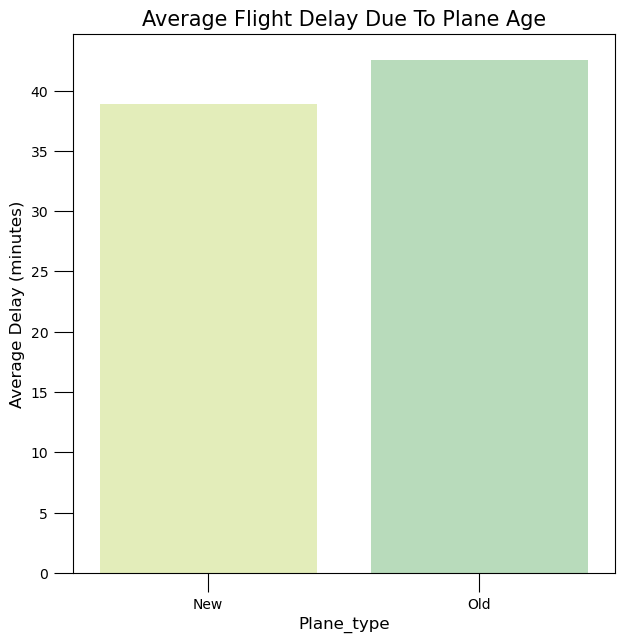

In [20]:
# a barplot to show the delay plane type has on flights
fig,ax=plt.subplots(1,1,figsize=(7,7))
sns.barplot(x='Plane_type', y='Total Average Delay' , data=delay_manuyear ,palette=my_color)

ax.set_xlabel('Plane_type',size=12)
ax.set_ylabel('Average Delay (minutes)',size=12)

ax.set_title('Average Flight Delay Due To Plane Age',size=15)

ax.tick_params(axis='x',size=14)
ax.tick_params(axis='y',size=14)

plt.savefig('Average Flight Delay Due To Plane Age.png')# saving the figure as png
plt.show()


In [21]:
# analysing the relationship between the age of the plane and delay created
df_merge

,Year,Month,DayofMonth,DayOfWeek,DepDelay,ArrDelay,DepTime,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,Manufactured_year
0,2006,1,11,3,132,149,1752,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
1,2006,1,11,3,121,93,2011,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
2,2006,1,12,4,39,23,739,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
3,2006,1,13,5,52,42,2052,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
4,2006,1,13,5,130,144,910,N105UW,Corporation,AIRBUS INDUSTRIE,07/22/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137479,2007,12,27,4,24,61,1309,N665JB,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
4137480,2007,12,29,6,6,40,606,N665JB,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
4137481,2007,12,29,6,52,45,1252,N665JB,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007
4137482,2007,12,29,6,37,51,842,N665JB,Corporation,AIRBUS,12/13/2007,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2007


In [22]:
#removing the elements 0000 and None from 'Manufactured_year' as these do not make sense
df_merge= df_merge[(df_merge["Manufactured_year"] != "0000") & (df_merge["Manufactured_year"] != "None")]
df_merge.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepDelay                  0
ArrDelay                  0
DepTime                   0
TailNum                   0
type                 230830
manufacturer         230830
issue_date           230830
model                230830
status               230830
aircraft_type        230830
engine_type          230830
Manufactured_year    230830
dtype: int64

In [23]:
#dropping Nan values in 'Manufactured_year'
df_merge.dropna(inplace=True)

C:\Users\Ibrahim Hameem\AppData\Local\Temp\ipykernel_20860\3069186991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.dropna(inplace=True)


In [24]:
# create a new column called 'Age'
df_merge['Age']=df_merge['Year'].astype(int)-df_merge['Manufactured_year'].astype(int)

C:\Users\Ibrahim Hameem\AppData\Local\Temp\ipykernel_20860\2230925997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['Age']=df_merge['Year'].astype(int)-df_merge['Manufactured_year'].astype(int)


In [25]:
# age of -1 must be removed
df_merge=df_merge[df_merge['Age']!=-1]

In [26]:
df_merge['Age'].value_counts() #-1 has been removed from 'Age'

5     306348
6     297984
4     284643
7     280773
3     265169
8     253145
2     215040
9     174706
1     168734
19    124684
10    123403
16    120684
15    117854
11    115217
18    112127
17    109378
12    104826
20     95351
14     95295
13     92104
21     88228
22     59771
0      57107
23     17382
39     15023
38     13005
24     10036
28      9313
27      8525
31      8349
29      6841
30      6636
40      6178
37      5284
32      4891
25      3032
26      2992
33      1530
34      1320
36      1171
44      1005
43       951
41       932
48       838
42       791
47       772
45       445
35       390
50       324
49       242
51        77
Name: Age, dtype: int64

In [27]:
# creating a new dataframe for further analysis
df_new=df_merge[['Age','ArrDelay','DepDelay']].groupby('Age').mean().reset_index()

In [28]:
df_new.isnull().sum() # checking for null values

Age         0
ArrDelay    0
DepDelay    0
dtype: int64

In [29]:
df_new # exploring the dataset

,Age,ArrDelay,DepDelay
0,0,39.826904,37.239025
1,1,40.068273,37.804639
2,2,40.585203,38.500186
3,3,40.892220,38.936312
4,4,42.736540,40.268231
5,5,41.451656,38.704992
6,6,40.963998,38.174043
7,7,41.365345,38.646234
8,8,41.658141,39.164716
9,9,42.647087,40.760380


In [30]:
#creating a new column called 'Total Average Delay' by summing the mean 'ArrDelay' and 'DepDelay' and dividing by 2
df_new['Total Average Delay']=(df_new['DepDelay']+ df_new['ArrDelay'])/2

df_new# exploring the dataset

,Age,ArrDelay,DepDelay,Total Average Delay
0,0,39.826904,37.239025,38.532964
1,1,40.068273,37.804639,38.936456
2,2,40.585203,38.500186,39.542694
3,3,40.892220,38.936312,39.914266
4,4,42.736540,40.268231,41.502385
5,5,41.451656,38.704992,40.078324
6,6,40.963998,38.174043,39.569020
7,7,41.365345,38.646234,40.005789
8,8,41.658141,39.164716,40.411428
9,9,42.647087,40.760380,41.703734


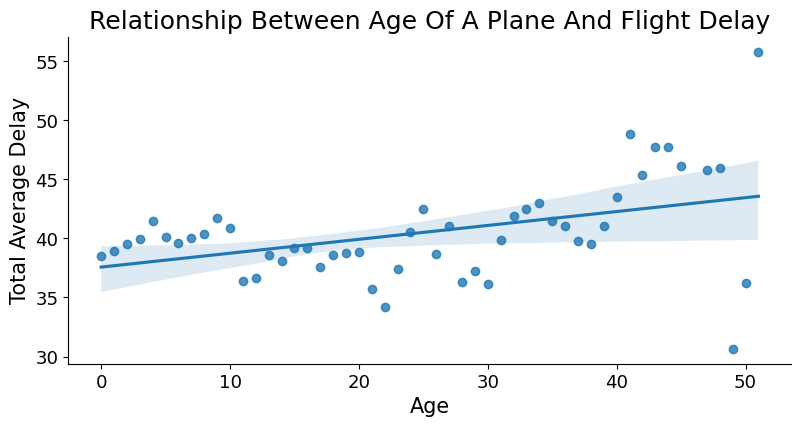

In [31]:
#displaying the relationship between the age and total delay

sns.lmplot(x="Age", y="Total Average Delay", data=df_new, aspect = 2, height = 4, palette = "YlGnBu")


plt.title("Relationship Between Age Of A Plane And Flight Delay",
                size = 18)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)

plt.xlabel("Age", fontsize = 15)
plt.ylabel("Total Average Delay", fontsize = 15)


plt.savefig("Relationship Between Age Of A Plane And Flight Delay.png")
plt.show()


In [32]:
# The figure above shows that there is a linear association between the age of the plane and the delay caused.
# we can check the correlation between the variables to check the strenght of the linear association
df_new['Age'].corr(df_new['Total Average Delay']) # we see a  positive correlation between the variables 'Age' and 'Total Average Delay'

0.42599069311325305

In [33]:
# we conclude older planes suffer more delays than new planes
